In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install download

In [3]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 57.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
  Created wheel for pymeeus: filename=PyMeeus-0.5.12

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from download import download

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [5]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq',kind='zip')

Creating data folder...

file_sizes: 7.96MB [00:00, 12.9MB/s]
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [6]:
!ls /tmp/aq/PRSA_Data_20130301-20170228

PRSA_Data_Aotizhongxin_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [7]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [8]:
aq_df_sh = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date)

/tmp/ipykernel_13/1044459831.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  aq_df_sh = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date)
/tmp/ipykernel_13/1044459831.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  aq_df_sh = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date)


In [9]:
aq_df_wa = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date)

/tmp/ipykernel_13/3511166363.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  aq_df_wa = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date)
/tmp/ipykernel_13/3511166363.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  aq_df_wa = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date)


In [10]:
aq_df_gu = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date)

/tmp/ipykernel_13/856751465.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  aq_df_gu = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date)
/tmp/ipykernel_13/856751465.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  aq_df_gu = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date)


In [11]:
aq_df = pd.concat([aq_df_sh,aq_df_wa,aq_df_gu],ignore_index=True,sort=False)

In [12]:
aq_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,35060,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
105188,2017-02-28 20:00:00,35061,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
105189,2017-02-28 21:00:00,35062,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
105190,2017-02-28 22:00:00,35063,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


In [13]:
aq_df = aq_df.drop(['wd'],axis=1)

In [14]:
aq_df = aq_df.set_index('year_month_day_hour').groupby('station').resample('D').mean()

In [15]:
aq_df

No       PM2.5        PM10        SO2  \
station year_month_day_hour                                               
Gucheng 2013-03-01              12.5    8.625000   16.875000   7.391304   
        2013-03-02              36.5   36.916667   51.375000  37.291667   
        2013-03-03              60.5   80.333333  120.041667  47.541667   
        2013-03-04              84.5   26.500000   51.291667  18.666667   
        2013-03-05             108.5  136.708333  172.541667  75.130435   
...                              ...         ...         ...        ...   
Wanliu  2017-02-24           34956.5   21.458333   39.666667   8.750000   
        2017-02-25           34980.5    8.250000   21.166667   6.375000   
        2017-02-26           35004.5   27.125000   44.583333  14.250000   
        2017-02-27           35028.5   64.000000   95.916667  17.869565   
        2017-02-28           35052.5    9.958333   25.583333   7.458333   

                                   NO2           CO         O3       TEMP  \
station year_month_day_hour                                                 
Gucheng 2013-03-01           14.250000   869.565217  77.130435   1.691667   
        2013-03-02           37.565217  1479.041667  39.583333   0.820833   
        2013-03-03           63.333333  2349.708333  33.708333   6.562500   
        2013-03-04           32.666667  1170.666667  67.250000   9.795833   
        2013-03-05           73.500000  1381.545455  84.375000   6.750000   
...                                ...          ...        ...        ...   
Wanliu  2017-02-24           55.875000   837.500000  38.583333   4.395833   
        2017-02-25           36.916667   491.666667  56.375000   6.387500   
        2017-02-26           69.916667   887.500000  30.250000   6.720833   
        2017-02-27           89.826087  1643.478261  17.136364   7.220833   
        2017-02-28           40.916667   479.166667  54.791667  10.516667   

                                    PRES       DEWP  RAIN      WSPM  
station year_month_day_hour                                          
Gucheng 2013-03-01           1024.816667 -19.691667   0.0  2.350000  
        2013-03-02           1024.900000 -16.337500   0.0  1.087500  
        2013-03-03           1012.566667 -11.991667   0.0  1.400000  
        2013-03-04           1015.608333 -11.945833   0.0  1.541667  
        2013-03-05           1008.883333  -7.741667   0.0  0.841667  
...                                  ...        ...   ...       ...  
Wanliu  2017-02-24           1019.466667 -10.583333   0.0  1.262500  
        2017-02-25           1017.287500  -9.900000   0.0  1.466667  
        2017-02-26           1018.758333  -7.558333   0.0  1.562500  
        2017-02-27           1015.554167  -6.333333   0.0  1.316667  
        2017-02-28           1013.345833 -12.266667   0.0  1.800000  

[4383 rows x 12 columns]

In [16]:
aq_df = aq_df.reset_index()

<Axes: xlabel='year_month_day_hour'>

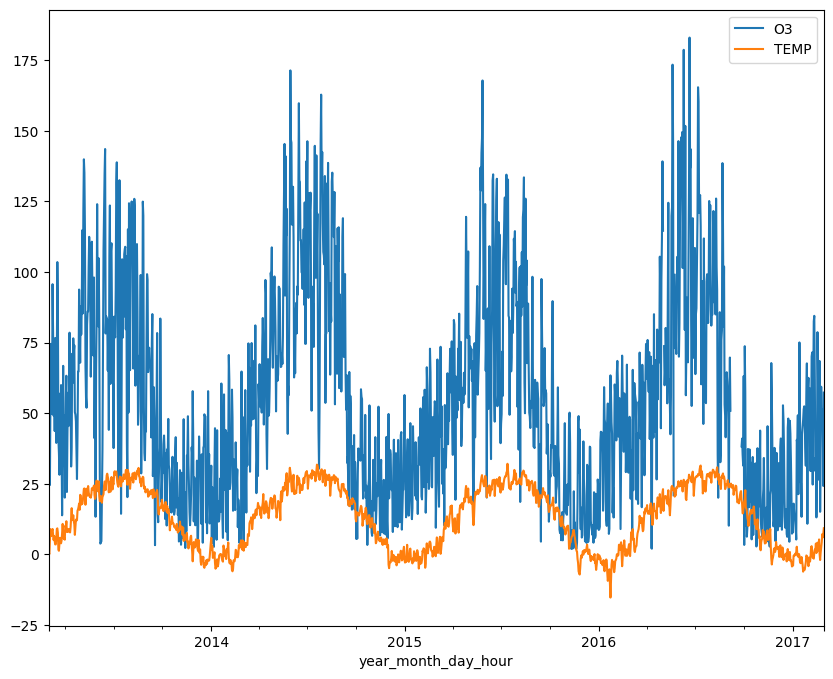

In [17]:
aq_df.set_index('year_month_day_hour').query("station == 'Shunyi'")[['O3','TEMP']].plot()

<Axes: xlabel='year_month_day_hour'>

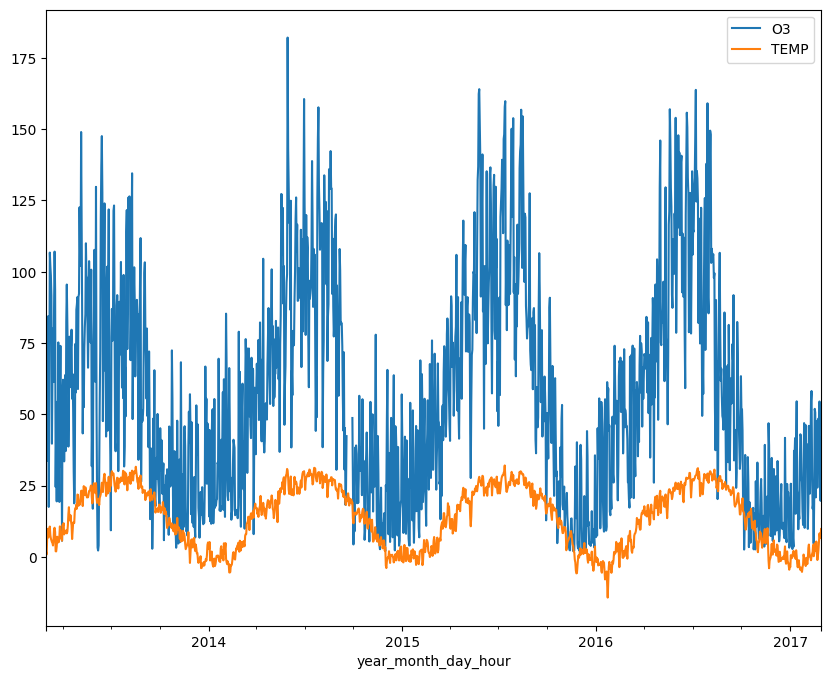

In [18]:
aq_df.set_index('year_month_day_hour').query("station == 'Gucheng'")[['O3','TEMP']].plot()

<Axes: xlabel='year_month_day_hour'>

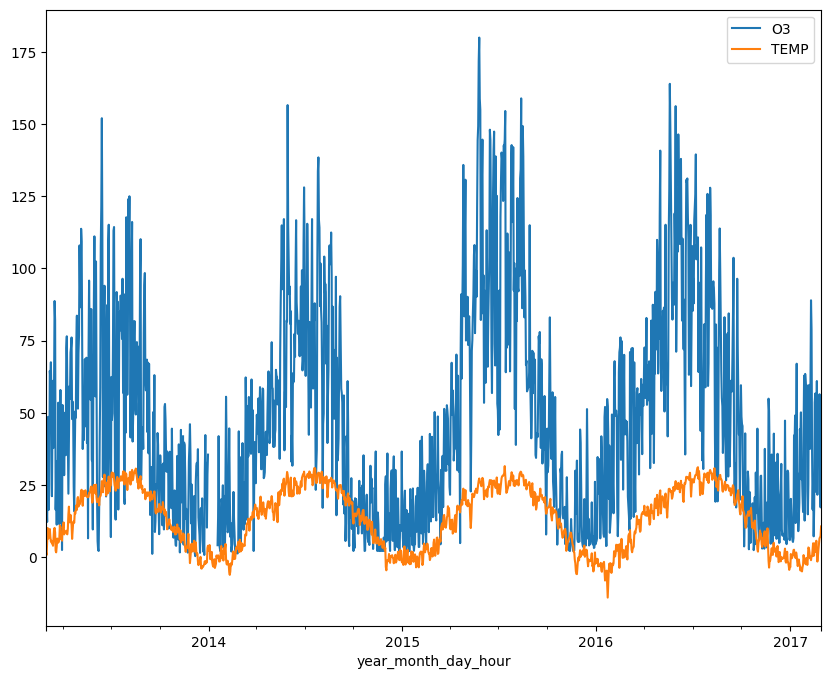

In [19]:
aq_df.set_index('year_month_day_hour').query("station == 'Wanliu'")[['O3','TEMP']].plot()

In [20]:
aq_df

,station,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Gucheng,2013-03-01,12.5,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
1,Gucheng,2013-03-02,36.5,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2,Gucheng,2013-03-03,60.5,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
3,Gucheng,2013-03-04,84.5,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
4,Gucheng,2013-03-05,108.5,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,Wanliu,2017-02-24,34956.5,21.458333,39.666667,8.750000,55.875000,837.500000,38.583333,4.395833,1019.466667,-10.583333,0.0,1.262500
4379,Wanliu,2017-02-25,34980.5,8.250000,21.166667,6.375000,36.916667,491.666667,56.375000,6.387500,1017.287500,-9.900000,0.0,1.466667
4380,Wanliu,2017-02-26,35004.5,27.125000,44.583333,14.250000,69.916667,887.500000,30.250000,6.720833,1018.758333,-7.558333,0.0,1.562500
4381,Wanliu,2017-02-27,35028.5,64.000000,95.916667,17.869565,89.826087,1643.478261,17.136364,7.220833,1015.554167,-6.333333,0.0,1.316667


In [21]:
aq_df['station'].unique()

array(['Gucheng', 'Shunyi', 'Wanliu'], dtype=object)

In [22]:
! pip install prophet

In [23]:
from prophet import Prophet

In [24]:
aq_df_final = aq_df[['year_month_day_hour','O3','TEMP','station']].rename({'year_month_day_hour':'ds','O3':'y'},axis='columns')

In [25]:
aq_df_final

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
...,...,...,...,...
4378,2017-02-24,38.583333,4.395833,Wanliu
4379,2017-02-25,56.375000,6.387500,Wanliu
4380,2017-02-26,30.250000,6.720833,Wanliu
4381,2017-02-27,17.136364,7.220833,Wanliu


In [26]:
stations = aq_df_final.groupby('station')

In [27]:
stations.head()

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
1461,2013-03-01,62.478261,0.541667,Shunyi
1462,2013-03-02,40.416667,0.083333,Shunyi
1463,2013-03-03,24.541667,5.029167,Shunyi
1464,2013-03-04,55.125000,8.937500,Shunyi
1465,2013-03-05,74.541667,6.450000,Shunyi


In [28]:
target = pd.DataFrame()

09:50:53 - cmdstanpy - INFO - Chain [1] start processing
09:50:53 - cmdstanpy - INFO - Chain [1] done processing
09:50:54 - cmdstanpy - INFO - Chain [1] start processing
09:50:54 - cmdstanpy - INFO - Chain [1] done processing
09:50:54 - cmdstanpy - INFO - Chain [1] start processing
09:50:54 - cmdstanpy - INFO - Chain [1] done processing


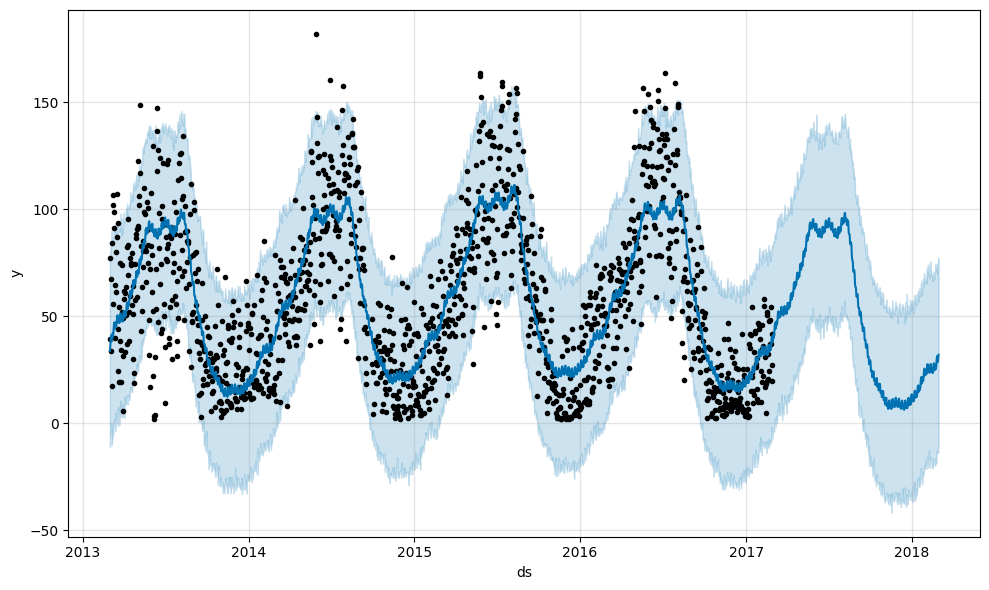

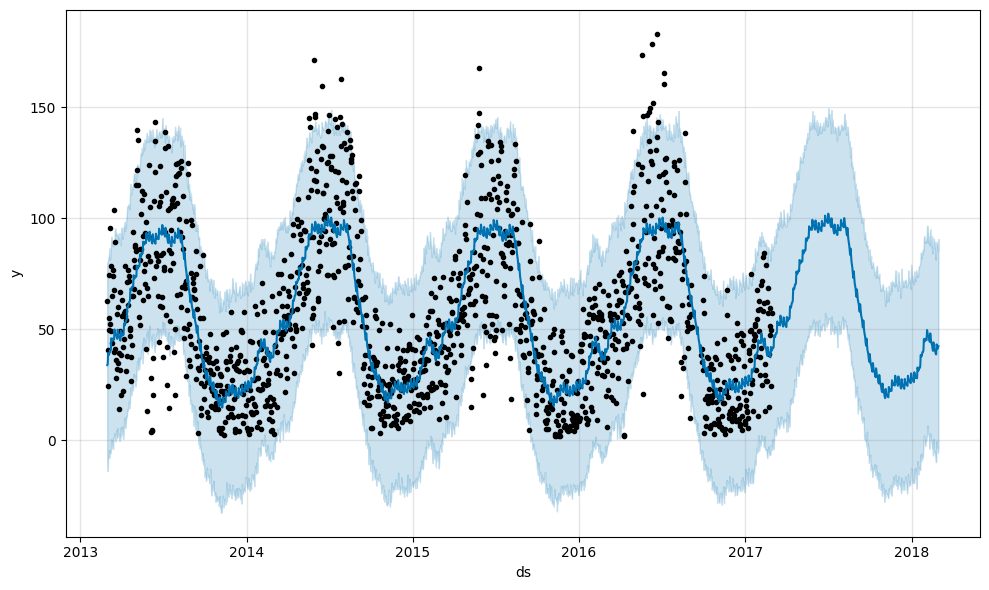

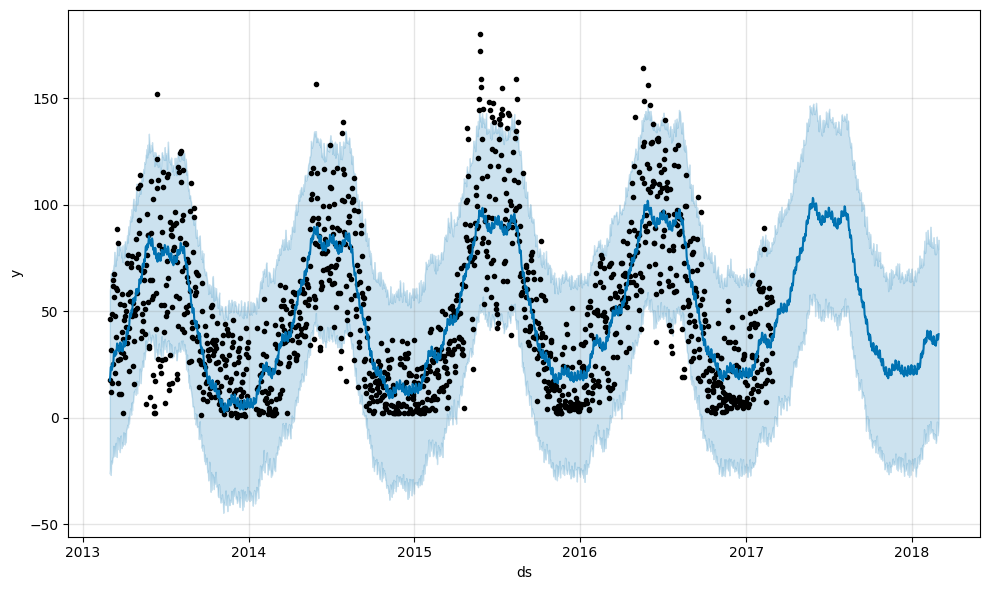

In [29]:
for station in stations.groups:
    group = stations.get_group(station)

    m = Prophet(interval_width=0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods = 366)
    forecast = m.predict(future)
    m.plot(forecast)
    forecast = forecast.rename(columns = {'yhat': 'yhat_'+station})
    target = pd.merge(target,forecast.set_index('ds'),how = 'outer', left_index=True,right_index=True)

In [30]:
target

,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,weekly_x,weekly_lower_x,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_Wanliu
ds,,,,,,,,,,,,,,,,,,,,,
2013-03-01,49.021454,-11.250853,74.863508,49.021454,49.021454,-15.180251,-15.180251,-15.180251,-1.940732,-1.940732,...,-1.924068,-1.924068,-1.924068,-17.357239,-17.357239,-17.357239,0.0,0.0,0.0,17.372871
2013-03-02,49.035917,-6.335359,79.783560,49.035917,49.035917,-13.116676,-13.116676,-13.116676,-0.800532,-0.800532,...,-0.469197,-0.469197,-0.469197,-16.479257,-16.479257,-16.479257,0.0,0.0,0.0,19.718881
2013-03-03,49.050379,-5.656571,84.480174,49.050379,49.050379,-9.354379,-9.354379,-9.354379,2.014887,2.014887,...,2.407605,2.407605,2.407605,-15.540663,-15.540663,-15.540663,0.0,0.0,0.0,23.547434
2013-03-04,49.064842,-0.399864,85.556106,49.064842,49.064842,-8.105369,-8.105369,-8.105369,2.304835,2.304835,...,1.930474,1.930474,1.930474,-14.556760,-14.556760,-14.556760,0.0,0.0,0.0,24.067363
2013-03-05,49.079304,-10.293336,90.056692,49.079304,49.079304,-10.735767,-10.735767,-10.735767,-1.285211,-1.285211,...,-0.940768,-0.940768,-0.940768,-13.543840,-13.543840,-13.543840,0.0,0.0,0.0,22.222198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,45.121397,-13.048113,74.586445,42.458547,47.973298,-14.654627,-14.654627,-14.654627,2.014887,2.014887,...,2.407605,2.407605,2.407605,-20.126084,-20.126084,-20.126084,0.0,0.0,0.0,38.715225
2018-02-26,45.098732,-13.970915,73.442569,42.427026,47.970772,-13.649469,-13.649469,-13.649469,2.304835,2.304835,...,1.930474,1.930474,1.930474,-19.636886,-19.636886,-19.636886,0.0,0.0,0.0,38.730729
2018-02-27,45.076066,-13.051358,69.770513,42.395505,47.967154,-16.462072,-16.462072,-16.462072,-1.285211,-1.285211,...,-0.940768,-0.940768,-0.940768,-19.042038,-19.042038,-19.042038,0.0,0.0,0.0,36.457771
